In [1]:
#import dependencies

import matplotlib.pyplot as plt
import csv
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
import os
import io
from io import StringIO
from datetime import datetime as dt
import numpy as np

In [2]:
#path to csv file
netflix_file = "../ETL_Project/netflix.csv"

#Read in csv file  
netflix_df = pd.read_csv(netflix_file)

#create a variable/df and split rows that have multiple countries in a single row and stack them into the new df
netflix_df_2 = netflix_df.Country.str.split(',').apply(pd.Series, 1).stack()

#drop the index from intial df and join both dfs
netflix_df_2.index = netflix_df_2.index.droplevel(-1)
netflix_df_2.name = 'Country'
del netflix_df['Country']
netflix_df = netflix_df.join(netflix_df_2)

In [3]:
#removed unnecessary columns by calling in only the columns we need
netflix_col=["Title", "Category", "Year", "Country", "Rating", "List"]
netflix_transformed=netflix_df[netflix_col].copy()

#count of values in the columns
netflix_transformed.count()


Title       7658
Category    7658
Year        7647
Country     7182
Rating      7648
List        7658
dtype: int64

In [4]:
#drop rows that do not have a value in 'country' column
netflix_transformed= netflix_transformed.dropna(subset=['Country'])

#count of values in the columns
netflix_transformed.count()

Title       7182
Category    7182
Year        7173
Country     7182
Rating      7176
List        7182
dtype: int64

In [5]:
#drop rows that do not have a value in 'date added' column
netflix_transformed= netflix_transformed.dropna(subset=['Year'])

#count of values in the columns
netflix_transformed.count()

Title       7173
Category    7173
Year        7173
Country     7173
Rating      7167
List        7173
dtype: int64

In [6]:
#### We Missed dropping Rows with an empty Rating####
### Should have had this code here ###

# #drop rows that do not have a value in 'date added' column
# netflix_transformed= netflix_transformed.dropna(subset=['Rating'])
# print(netflix_transformed.count())

# #count of values in the columns
# netflix_transformed.count()


In [7]:
#extract rows that have "United States" in the 'country' column
netflix_transformed_US = netflix_transformed.loc[(netflix_transformed["Country"]=="United States")]
netflix_transformed_US.count()



Title       2296
Category    2296
Year        2296
Country     2296
Rating      2293
List        2296
dtype: int64

In [8]:
#extract rows that have "Canada" in the 'country' column
netflix_transformed_CA = netflix_transformed.loc[(netflix_transformed["Country"]== "Canada")]
netflix_transformed_CA.count()

Title       206
Category    206
Year        206
Country     206
Rating      206
List        206
dtype: int64

In [9]:
#join the United States and Canada dataframes
netflix_transformed = netflix_transformed_US.append(netflix_transformed_CA)
print(netflix_transformed)
print(netflix_transformed.count())

                                        Title Category             Year  \
0     Norm of the North: King Sized Adventure    Movie         9-Sep-19   
2                          Transformers Prime  TV Show         8-Sep-18   
3            Transformers: Robots in Disguise  TV Show         8-Sep-18   
4                                #realityhigh    Movie         8-Sep-17   
8                                Fire Chasers  TV Show         8-Sep-17   
...                                       ...      ...              ...   
6188             Roman Empire: Reign of Blood  TV Show    April 5, 2019   
6192                        Kim's Convenience  TV Show    April 3, 2019   
6208                                Lost Girl  TV Show   April 17, 2016   
6209                                Mr. Young  TV Show   April 16, 2019   
6220                              Justin Time  TV Show    April 1, 2016   

            Country    Rating                                List  
0     United States     TV-PG  

In [10]:
# drop duplicated indexes
netflix_transformed.drop_duplicates(keep='first')

#view the df
print(netflix_transformed)

                                        Title Category             Year  \
0     Norm of the North: King Sized Adventure    Movie         9-Sep-19   
2                          Transformers Prime  TV Show         8-Sep-18   
3            Transformers: Robots in Disguise  TV Show         8-Sep-18   
4                                #realityhigh    Movie         8-Sep-17   
8                                Fire Chasers  TV Show         8-Sep-17   
...                                       ...      ...              ...   
6188             Roman Empire: Reign of Blood  TV Show    April 5, 2019   
6192                        Kim's Convenience  TV Show    April 3, 2019   
6208                                Lost Girl  TV Show   April 17, 2016   
6209                                Mr. Young  TV Show   April 16, 2019   
6220                              Justin Time  TV Show    April 1, 2016   

            Country    Rating                                List  
0     United States     TV-PG  

In [11]:
# check for duplicates in Movie titles
netflix_transformed_dups = netflix_transformed.duplicated(subset=['Title'])
netflix_transformed_dups

0       False
2       False
3       False
4       False
8       False
        ...  
6188    False
6192    False
6208    False
6209    False
6220    False
Length: 2502, dtype: bool

In [12]:
#count of duplicates found
netflix_transformed_dups.loc[(netflix_transformed_dups == True)].count()

9

In [13]:
# Drop rows with Duplicate Movie title
cleaned_netflix_transformed = netflix_transformed.drop_duplicates(subset=["Title"], keep='last')
cleaned_netflix_transformed

,Title,Category,Year,Country,Rating,List
0,Norm of the North: King Sized Adventure,Movie,9-Sep-19,United States,TV-PG,"Children & Family Movies, Comedies"
2,Transformers Prime,TV Show,8-Sep-18,United States,TV-Y7-FV,Kids' TV
3,Transformers: Robots in Disguise,TV Show,8-Sep-18,United States,TV-Y7,Kids' TV
4,#realityhigh,Movie,8-Sep-17,United States,TV-14,Comedies
8,Fire Chasers,TV Show,8-Sep-17,United States,TV-MA,"Docuseries, Science & Nature TV"
...,...,...,...,...,...,...
6188,Roman Empire: Reign of Blood,TV Show,"April 5, 2019",Canada,TV-MA,Docuseries
6192,Kim's Convenience,TV Show,"April 3, 2019",Canada,TV-14,TV Comedies
6208,Lost Girl,TV Show,"April 17, 2016",Canada,TV-14,"TV Dramas, TV Horror, TV Mysteries"
6209,Mr. Young,TV Show,"April 16, 2019",Canada,TV-G,"Kids' TV, TV Comedies"


In [14]:
#path to csv file
sub_file = "../ETL_Project/subscriber.csv"

#Read in csv file 
sub_df = pd.read_csv(sub_file)
sub_df.head()

,Area,Years,Subscribers
0,United States and Canada,Q1 - 2018,60909000
1,"Europe, Middle East and Africa",Q1 - 2018,29339000
2,Latin America,Q1 - 2018,21260000
3,Asia-Pacific,Q1 - 2018,7394000
4,United States and Canada,Q2 - 2018,61870000


In [15]:
# convert the 'Years' column to datetime format
cleaned_netflix_transformed["Year"]=pd.to_datetime(cleaned_netflix_transformed['Year'])

#created a start and end date to grab only the rows between 2018-2020
start_date = '12-31-2017'
end_date = '12-31-2020'

#created a variable to hold the dates
year_filtered_df = (cleaned_netflix_transformed['Year'] > start_date) & (cleaned_netflix_transformed['Year'] <= end_date)

#filtered the rows using the previous 'year_filtered_df' variable created and a .loc to only have years from 2018-2020
cleaned_netflix_transformed = cleaned_netflix_transformed.loc[year_filtered_df]
cleaned_netflix_transformed

<ipython-input-15-bd8af70acf61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_netflix_transformed["Year"]=pd.to_datetime(cleaned_netflix_transformed['Year'])


,Title,Category,Year,Country,Rating,List
0,Norm of the North: King Sized Adventure,Movie,2019-09-09,United States,TV-PG,"Children & Family Movies, Comedies"
2,Transformers Prime,TV Show,2018-09-08,United States,TV-Y7-FV,Kids' TV
3,Transformers: Robots in Disguise,TV Show,2018-09-08,United States,TV-Y7,Kids' TV
27,City of Joy,Movie,2018-09-07,United States,TV-MA,Documentaries
31,Sierra Burgess Is A Loser,Movie,2018-09-07,United States,PG-13,"Comedies, Romantic Movies"
...,...,...,...,...,...,...
6145,Workin' Moms,TV Show,2019-08-29,Canada,TV-MA,"International TV Shows, TV Comedies"
6174,Heartland,TV Show,2019-08-01,Canada,TV-PG,TV Dramas
6188,Roman Empire: Reign of Blood,TV Show,2019-04-05,Canada,TV-MA,Docuseries
6192,Kim's Convenience,TV Show,2019-04-03,Canada,TV-14,TV Comedies


In [16]:
#changed 'Year' column to datetime
cleaned_netflix_transformed["Year"]=pd.to_datetime(cleaned_netflix_transformed['Year'])

#updated df to only display year only from 'Year' column
cleaned_netflix_transformed["Year"]=cleaned_netflix_transformed["Year"].dt.strftime("%Y")

cleaned_netflix_transformed.head()

<ipython-input-16-59ef94a111f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_netflix_transformed["Year"]=pd.to_datetime(cleaned_netflix_transformed['Year'])
<ipython-input-16-59ef94a111f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_netflix_transformed["Year"]=cleaned_netflix_transformed["Year"].dt.strftime("%Y")


,Title,Category,Year,Country,Rating,List
0,Norm of the North: King Sized Adventure,Movie,2019,United States,TV-PG,"Children & Family Movies, Comedies"
2,Transformers Prime,TV Show,2018,United States,TV-Y7-FV,Kids' TV
3,Transformers: Robots in Disguise,TV Show,2018,United States,TV-Y7,Kids' TV
27,City of Joy,Movie,2018,United States,TV-MA,Documentaries
31,Sierra Burgess Is A Loser,Movie,2018,United States,PG-13,"Comedies, Romantic Movies"


In [17]:
#### Initially planned on using the 'Title' column but not enough information to use it ####
#### so we dropped it from our datafrome at this point.  ####

cleaned_netflix_transformed=cleaned_netflix_transformed.drop(columns=['Title'])
cleaned_netflix_transformed

,Category,Year,Country,Rating,List
0,Movie,2019,United States,TV-PG,"Children & Family Movies, Comedies"
2,TV Show,2018,United States,TV-Y7-FV,Kids' TV
3,TV Show,2018,United States,TV-Y7,Kids' TV
27,Movie,2018,United States,TV-MA,Documentaries
31,Movie,2018,United States,PG-13,"Comedies, Romantic Movies"
...,...,...,...,...,...
6145,TV Show,2019,Canada,TV-MA,"International TV Shows, TV Comedies"
6174,TV Show,2019,Canada,TV-PG,TV Dramas
6188,TV Show,2019,Canada,TV-MA,Docuseries
6192,TV Show,2019,Canada,TV-14,TV Comedies


In [18]:
#### Believe the Subscribers.csv only had 3 columns, so unsure why this 1st step was utilized ####

#filtered unnecessary columns by calling in only the columns we need
sub_col=["Area","Years","Subscribers"]
sub_transformed= sub_df[sub_col].copy()

sub_transformed["Years"]=sub_transformed["Years"].str.split(" - ").str[1]

In [19]:
#view dataframe and it's info
print(sub_transformed)
sub_transformed.info()

                               Area Years  Subscribers
0          United States and Canada  2018     60909000
1   Europe,  Middle East and Africa  2018     29339000
2                     Latin America  2018     21260000
3                      Asia-Pacific  2018      7394000
4          United States and Canada  2018     61870000
5   Europe,  Middle East and Africa  2018     31317000
6                     Latin America  2018     22795000
7                      Asia-Pacific  2018      8372000
8          United States and Canada  2018     63010000
9   Europe,  Middle East and Africa  2018     33836000
10                    Latin America  2018     24115000
11                     Asia-Pacific  2018      9461000
12         United States and Canada  2018     64757000
13  Europe,  Middle East and Africa  2018     37818000
14                    Latin America  2018     26077000
15                     Asia-Pacific  2018     10607000
16         United States and Canada  2019     66633000
17  Europe

In [20]:
#filter for rows that have "United States and Canada" in the 'Area' column
cleaned_sub_transformed=sub_transformed.loc[(sub_transformed["Area"]=="United States and Canada")]

#view dataframe and it's info
print(cleaned_sub_transformed)
cleaned_sub_transformed.info()

                        Area Years  Subscribers
0   United States and Canada  2018     60909000
4   United States and Canada  2018     61870000
8   United States and Canada  2018     63010000
12  United States and Canada  2018     64757000
16  United States and Canada  2019     66633000
20  United States and Canada  2019     66501000
24  United States and Canada  2019     67114000
28  United States and Canada  2019     67662000
32  United States and Canada  2020     69969000
36  United States and Canada  2020     72904000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 36
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         10 non-null     object
 1   Years        10 non-null     object
 2   Subscribers  10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [21]:
#### This part is completed below ####
# cleaned_sub_transformed = cleaned_sub_transformed.rename(columns={"Area": "Area","Years": "Year", "Subscribers": "Subscribers"})

# cleaned_sub_transformed

In [22]:
#### Not Necessary as will add an 'id' column and then set that to be the index ####

# #Reset the index so they are no missing index numbers on both dataframes
# cleaned_netflix_transformed = cleaned_netflix_transformed.reset_index(drop=True)
# cleaned_sub_transformed = cleaned_sub_transformed.reset_index(drop=True)
# print(cleaned_netflix_transformed)
# print(cleaned_sub_transformed)

In [23]:
#Create 'id' column so it can be used as an index
cleaned_sub_transformed['id'] = range(1, 1+len(cleaned_sub_transformed))
cleaned_sub_transformed

<ipython-input-23-cf521bdc941c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_sub_transformed['id'] = range(1, 1+len(cleaned_sub_transformed))


,Area,Years,Subscribers,id
0,United States and Canada,2018,60909000,1
4,United States and Canada,2018,61870000,2
8,United States and Canada,2018,63010000,3
12,United States and Canada,2018,64757000,4
16,United States and Canada,2019,66633000,5
20,United States and Canada,2019,66501000,6
24,United States and Canada,2019,67114000,7
28,United States and Canada,2019,67662000,8
32,United States and Canada,2020,69969000,9
36,United States and Canada,2020,72904000,10


In [24]:
#Renamed columns in all lower case so they can be entered in relational DB (SQL) without error
cleaned_sub_transformed = cleaned_sub_transformed.rename(columns={"id": "id","Area":"area", "Years":"year", "Subscribers":"subscribers"})
cleaned_sub_transformed

,area,year,subscribers,id
0,United States and Canada,2018,60909000,1
4,United States and Canada,2018,61870000,2
8,United States and Canada,2018,63010000,3
12,United States and Canada,2018,64757000,4
16,United States and Canada,2019,66633000,5
20,United States and Canada,2019,66501000,6
24,United States and Canada,2019,67114000,7
28,United States and Canada,2019,67662000,8
32,United States and Canada,2020,69969000,9
36,United States and Canada,2020,72904000,10


In [25]:
#Create 'id' column so it can be used as an index
cleaned_netflix_transformed['id'] = range(1, 1+len(cleaned_netflix_transformed))
cleaned_netflix_transformed

,Category,Year,Country,Rating,List,id
0,Movie,2019,United States,TV-PG,"Children & Family Movies, Comedies",1
2,TV Show,2018,United States,TV-Y7-FV,Kids' TV,2
3,TV Show,2018,United States,TV-Y7,Kids' TV,3
27,Movie,2018,United States,TV-MA,Documentaries,4
31,Movie,2018,United States,PG-13,"Comedies, Romantic Movies",5
...,...,...,...,...,...,...
6145,TV Show,2019,Canada,TV-MA,"International TV Shows, TV Comedies",1682
6174,TV Show,2019,Canada,TV-PG,TV Dramas,1683
6188,TV Show,2019,Canada,TV-MA,Docuseries,1684
6192,TV Show,2019,Canada,TV-14,TV Comedies,1685


In [26]:
#Renamed columns in all lower case so they can be entered in relational DB (SQL) without error
cleaned_netflix_transformed = cleaned_netflix_transformed.rename(columns={"id": "id","Category":"category", "Year":"year",\
                                                                          "Country":"country", "Rating": "rating", "List":"list"})
cleaned_netflix_transformed

,category,year,country,rating,list,id
0,Movie,2019,United States,TV-PG,"Children & Family Movies, Comedies",1
2,TV Show,2018,United States,TV-Y7-FV,Kids' TV,2
3,TV Show,2018,United States,TV-Y7,Kids' TV,3
27,Movie,2018,United States,TV-MA,Documentaries,4
31,Movie,2018,United States,PG-13,"Comedies, Romantic Movies",5
...,...,...,...,...,...,...
6145,TV Show,2019,Canada,TV-MA,"International TV Shows, TV Comedies",1682
6174,TV Show,2019,Canada,TV-PG,TV Dramas,1683
6188,TV Show,2019,Canada,TV-MA,Docuseries,1684
6192,TV Show,2019,Canada,TV-14,TV Comedies,1685


In [27]:
#set index for both dataframes to id
cleaned_netflix_transformed.set_index("id", inplace=True)
cleaned_sub_transformed.set_index("id", inplace=True)

In [28]:
#database connection
connection_string ="postgres:**********@localhost:5432/Netflix"
engine = create_engine(f'postgresql://{connection_string}')

In [29]:
#confirm tables
engine.table_names()

['netflix', 'subscribers']

In [30]:
### Load DataFrames into database
cleaned_netflix_transformed.to_sql(name='netflix', con=engine, if_exists='append', index = True)
cleaned_sub_transformed.to_sql(name='subscribers', con=engine, if_exists='append', index = True)

In [31]:
#Query confirmed through SQL database for neflix 
pd.read_sql_query('select * from netflix', con=engine).head()

,id,year,category,list,country,rating
0,1,2019,Movie,"Children & Family Movies, Comedies",United States,TV-PG
1,2,2018,TV Show,Kids' TV,United States,TV-Y7-FV
2,3,2018,TV Show,Kids' TV,United States,TV-Y7
3,4,2018,Movie,Documentaries,United States,TV-MA
4,5,2018,Movie,"Comedies, Romantic Movies",United States,PG-13


In [32]:
#Query confirmed through SQL database for Netflix subscribers

pd.read_sql_query('select * from subscribers', con=engine).head()

,id,subscribers,area,year
0,1,60909000,United States and Canada,2018
1,2,61870000,United States and Canada,2018
2,3,63010000,United States and Canada,2018
3,4,64757000,United States and Canada,2018
4,5,66633000,United States and Canada,2019


In [33]:
#The numbers of subscribers 
num_sub =sub_transformed.groupby("Years")
num_sub

In [34]:
max_sub = num_sub["Subscribers"].max()
max_sub

Years
2018    64757000
2019    67662000
2020    72904000
Name: Subscribers, dtype: int64

In [35]:
sub_df= pd.DataFrame({"Subscriber Count": max_sub,})
sub_df.head()

,Subscriber Count
Years,
2018,64757000
2019,67662000
2020,72904000


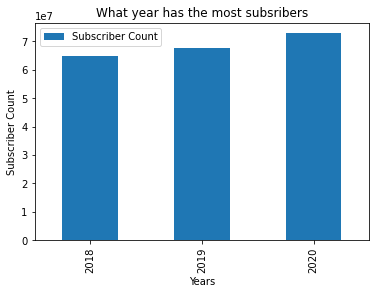

<Figure size 432x288 with 0 Axes>

In [52]:
sub_chart= sub_df.plot(kind="bar", title= "What year has the most subsribers")
sub_chart.set_xlabel("Years")
sub_chart.set_ylabel("Subscriber Count")
# plt.xlim(-.10, len(sub_df)-.10)
# plt.ylim(0, max(sub_df["Subscriber Count"])+5)
plt.show()
plt.tight_layout()

       Subscriber Count
Years                  
2018           64757000
2019           67662000
2020           72904000


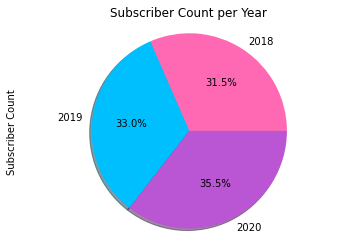

In [57]:

sub_count = pd.DataFrame(sub_df['Subscriber Count'])
print(sub_count.head())
sub_count.plot(kind="pie", y='Subscriber Count', autopct="%1.1f%%", colors = ["hotpink", "deepskyblue", "mediumorchid"], shadow=True, legend=False)
plt.axis("equal")
plt.title("Subscriber Count per Year")
plt.show()